<a href="https://colab.research.google.com/github/adamgogacz/time-series-processing/blob/main/pulse_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright 2022 d-Analytics. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

**To execute the code scroll down and run the "main" function; comment/uncomment lines to test the various filters (fft and convolution implementations).**

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import correlate
%matplotlib inline
plt.rcParams.update({'font.size': 8})

In [52]:
def genSweep(f0, f1, T, dt, num_pad):
  'Linear sweep generator'
  assert f0 > 0 and f1 > f0, 'The following condition was not met: 0 < f0 < f1'
  siglen = int(np.ceil(T/dt))
  x=np.linspace(0,T,siglen)
  return np.concatenate((np.sin(2.*np.pi*(f0*x+((f1-f0)/(2*T))*x**2)),np.zeros(num_pad)))

In [53]:
def plotResults(sig):   
  fig, axs=plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=200)
  idxSigmin, idxSigmax = 0, len(sig)
  idx=np.arange(len(sig))
  axs.plot(idx[idxSigmin:idxSigmax],sig[idxSigmin:idxSigmax])
  axs.set_xlabel('Sample')
  axs.set_xlim(idx[0],idx[-1])
  axs.set_title(label=f'Input signal (length = {len(sig)} samples)',fontdict=None, loc='center', pad=None)
 
  #fig.tight_layout()
  plt.show()

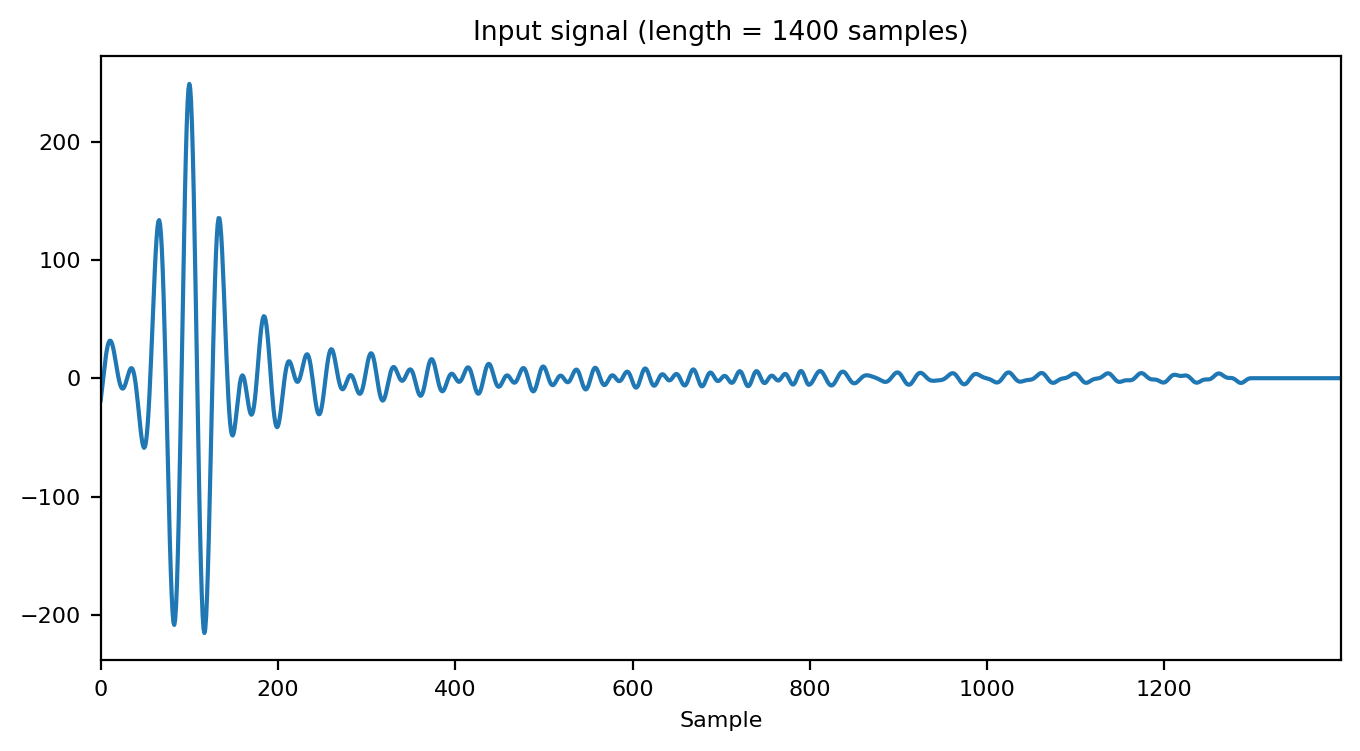

In [66]:
# STEP 1: generate signal
num_pad = 100
signal=genSweep(f0=1000.0,f1=3000,T=24e-3,dt=1/50e3,num_pad=num_pad) # sweep
# plotResults(signal)

# STEP 2: apply match filtering
filt = signal[:500]
pc_signal = correlate(signal,filt,mode='full')
plotResults(pc_signal[len(filt)-1-num_pad:])
# plotResults(pc_signal)